In [1]:
from dotenv import load_dotenv
import os
import wandb
import tarfile
import os
import shutil

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from itertools import cycle

from tqdm.notebook import tqdm

from collections import namedtuple

In [2]:
# Load .env file
load_dotenv()

# Access the API key
# api_key = os.getenv("WANDB_API_KEY")
api_key = "4140c08ae9644450d5f09dbdff386b71e689b04c"
wandb.login(key=api_key)

api = wandb.Api()

entity = "j4b"        # Your WandB username or team name
project = "rl-battery-management" # Your WandB project name
run_id = "ynniep8a" # "f8l4u7x4" # "waj0fjc3"         # ID of the specific run

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: janik-bischoff (j4b). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\zm0714\_netrc


In [3]:
# 20cs no_charge_in_breaks: 5ci1627k
# 4cs: smng8nfs
# 20cs charge_in_breaks (eval only): 5qdjkxob
# 20cs charge_in_breaks (train): q7y9vy3q
# Specify your project and run ID
# tpt: [0, 2, 4,..., 12] ept: 10: 2qemex9x

# Retrieve the run object
run = api.run(f"{entity}/{project}/runs/{run_id}")

In [4]:
n_cs = 2
n_partitions = 14
tar_name = 'experiment_data3'
root_dir = f'./result_data_charging_wepa/{n_cs}cs/'
root_dir_extraction = f'{root_dir}/result_data_remote3'

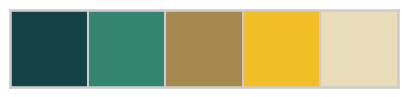

In [5]:
sns.set_style("whitegrid")
sns.set_context("talk")

hex_colors = ['#144246',
              #'#69657e',
              '#338470',
              '#a6874e',
              #'#FFFF33', '#FFD801', '#FFDF00',
              '#f2be25', '#e8dcb9']
pal = sns.color_palette(hex_colors, desat=1)
sns.palplot(pal)

In [6]:
shortnames = {
    'COL': 'COL',
    ' COL': 'COL',
    ' CTD': 'CTD',
    ' CTNR': 'CTNR',
    ' SL': 'SL',
    ' SLO': 'SLO',
    'RND':'RND',
    'allOrdersPopularity_future_z2': 'AOPF2',
    'allOrdersPopularity_future_z3': 'AOPF3',
    'allOrdersPopularity_future_z5': 'AOPF5',
    'allOrdersPopularity_past_z2': 'AOPP2',
    'allOrdersPopularity_past_z3': 'AOPP3',
    'allOrdersPopularity_past_z5': 'AOPP5',
    'classBasedCycleTime_z2': 'CBCT2',
    'classBasedCycleTime_z3': 'CBCT3',
    'classBasedCycleTime_z5': 'CBCT5',
    'retrievalPopularity_future_z2': 'ROPF2',
    'retrievalPopularity_future_z3': 'ROPF3',
    'retrievalPopularity_future_z5': 'ROPF5',
    'retrievalPopularity_past_z2': 'ROPP2',
    'retrievalPopularity_past_z3': 'ROPP3',
    'retrievalPopularity_past_z5': 'ROPP5',
    'VeryGreedy COL': 'GCOL',
    'DQN': 'COL',
    'SAC': 'SAC'
}

In [173]:
def order_files(src_dir):
    files = os.listdir(src_dir)
    pbar = tqdm(total=len(files))
    for i in range(len(files)):
        f_name = files[i]
        print(f_name)
        if not f_name.endswith('.csv') or 'actions' in f_name:
            continue
        segs = f_name.split('_')
        pt = segs[1]
        charging_policy = segs[3]
        th = segs[4]
        name = segs[2]
        new_name = shortnames[name]
        orders = f'{int(segs[-1].split(".")[0]):06}'
        tgt_dir = f'{src_dir}/partition_{pt}/{th}/{new_name}/'
        if not os.path.exists(tgt_dir):
            os.makedirs(tgt_dir)
        shutil.move(f'{src_dir}/{f_name}',
                    f'{tgt_dir}/{orders}.csv')
        pbar.update(1)


order_files(root_dir)

  0%|          | 0/2515 [00:00<?, ?it/s]

cib
pt_0_COL_FixedCharge_th30_596.csv
pt_0_COL_FixedCharge_th40_596.csv
pt_0_COL_FixedCharge_th50_596.csv
pt_0_COL_FixedCharge_th60_596.csv
pt_0_COL_FixedCharge_th70_596.csv
pt_0_COL_FixedCharge_th80_596.csv
pt_10_COL_FixedCharge_th30_1001.csv
pt_10_COL_FixedCharge_th30_10010.csv
pt_10_COL_FixedCharge_th30_11011.csv
pt_10_COL_FixedCharge_th30_12012.csv
pt_10_COL_FixedCharge_th30_13013.csv
pt_10_COL_FixedCharge_th30_14014.csv
pt_10_COL_FixedCharge_th30_15015.csv
pt_10_COL_FixedCharge_th30_16016.csv
pt_10_COL_FixedCharge_th30_17017.csv
pt_10_COL_FixedCharge_th30_18018.csv
pt_10_COL_FixedCharge_th30_19019.csv
pt_10_COL_FixedCharge_th30_2002.csv
pt_10_COL_FixedCharge_th30_20020.csv
pt_10_COL_FixedCharge_th30_21021.csv
pt_10_COL_FixedCharge_th30_22022.csv
pt_10_COL_FixedCharge_th30_23023.csv
pt_10_COL_FixedCharge_th30_24024.csv
pt_10_COL_FixedCharge_th30_25025.csv
pt_10_COL_FixedCharge_th30_26026.csv
pt_10_COL_FixedCharge_th30_27027.csv
pt_10_COL_FixedCharge_th30_28028.csv
pt_10_COL_FixedCh

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



pt_7_COL_FixedCharge_th60_31031.csv
pt_7_COL_FixedCharge_th60_32032.csv
pt_7_COL_FixedCharge_th60_32453.csv
pt_7_COL_FixedCharge_th60_4004.csv
pt_7_COL_FixedCharge_th60_5005.csv
pt_7_COL_FixedCharge_th60_6006.csv
pt_7_COL_FixedCharge_th60_7007.csv
pt_7_COL_FixedCharge_th60_8008.csv
pt_7_COL_FixedCharge_th60_9009.csv
pt_7_COL_FixedCharge_th70_1001.csv
pt_7_COL_FixedCharge_th70_10010.csv
pt_7_COL_FixedCharge_th70_11011.csv
pt_7_COL_FixedCharge_th70_12012.csv
pt_7_COL_FixedCharge_th70_13013.csv
pt_7_COL_FixedCharge_th70_14014.csv
pt_7_COL_FixedCharge_th70_15015.csv
pt_7_COL_FixedCharge_th70_16016.csv
pt_7_COL_FixedCharge_th70_17017.csv
pt_7_COL_FixedCharge_th70_18018.csv
pt_7_COL_FixedCharge_th70_19019.csv
pt_7_COL_FixedCharge_th70_2002.csv
pt_7_COL_FixedCharge_th70_20020.csv
pt_7_COL_FixedCharge_th70_21021.csv
pt_7_COL_FixedCharge_th70_22022.csv
pt_7_COL_FixedCharge_th70_23023.csv
pt_7_COL_FixedCharge_th70_24024.csv
pt_7_COL_FixedCharge_th70_25025.csv
pt_7_COL_FixedCharge_th70_26026.csv


In [7]:
def load_storage_strategy_dataframe(data_root):
    n_zones = 3
    try:
        strategy_name = data_root.split('/')[3]
        # n_zones = int(strategy_name[-1]) if strategy_name[-1].isdigit() else 3
    except:
        strategy_name = "DQN"
    if not os.path.exists(data_root):
        print(f"did not find path {data_root}; skipping...")
        return
    dfs = []
    csv_f_names = os.listdir(data_root)
    # pbar = tqdm(total=len(csv_f_names))
    print(f'Loading result files into dataframes for the '
          f'{strategy_name} simulation run...')
    for f_name in csv_f_names:
        if os.path.isdir(f'{data_root}/{f_name}') or f_name == '.DS_Store':
            #print(f'{data_root}/{f_name}')
            continue
        df_result_part = pd.read_csv(f'{data_root}/{f_name}', index_col=0)
        n_rows = df_result_part.shape[0]
        df_result_part['strategy_name'] = [strategy_name] * n_rows
        df_result_part['n_zones'] = [n_zones] * n_rows
        dfs.append(df_result_part)
        # print(strategy_name, n_zones, order_set_nr)
        # pbar.update(1)
    strategy_df = pd.concat(dfs).reset_index(drop=True)
    strategy_df.name = strategy_name
    return strategy_df

# dfs_d = dict({})
# n_agvs = 40
# for n_cs in range(1,9):
#     dfs_d[n_cs] = []
#     for shortname in shortnames.values():
#         df = load_storage_strategy_dataframe(
#             f'{root_dir}/n_agvs__{n_agvs}/n_cs__{n_cs}/{shortname}')
#         if df is not None:
#             dfs_d[n_cs].append(df)
dfs_d = dict({})
partitions = [i for i in range(n_partitions)]
thresholds = [30, 40, 50, 60, 70, 80]
for pt in partitions:
    print(f"Loading partition {pt}")
    dfs_d[pt] = []
    for th in thresholds:
        path = f'{root_dir}/partition_{pt}/th{th}/COL'
        df = load_storage_strategy_dataframe(path)
        if df is not None:
            dfs_d[pt].append(df)

Loading partition 0
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading partition 1
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading partition 2
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the  simulation run...
Loading result files into dataframes for the

In [9]:
dfs_d_actions = dict({})
models = ["PPO"]
for pt in partitions:
    dfs_d_actions[pt] = []
    for model in models:
        path = f'{root_dir}/pt_{pt}_thPPO_actions.csv'
        df = pd.read_csv(path)
        if df is not None:
            dfs_d_actions[pt].append(df)

FileNotFoundError: [Errno 2] No such file or directory: './result_data_charging_wepa/20cs/days52/pt_0_thPPO_actions.csv'

In [ ]:
thresholds = [0, 30, 40, 50, 60, 70, 80]
for pt in dfs_d_actions.keys():
    dfs_d_actions[pt][0]["Action"] = dfs_d_actions[pt][0]["Action"].apply(lambda x: thresholds[x])

In [8]:
def gen_result_table(dfs_d, value, mode):
    list_of_dfs = []
    for idx in partitions:
        print("Loading partition", idx)
        # print(idx)
        df_results_pt = pd.DataFrame(columns=[f"{idx}"])
        for df in dfs_d[idx]:
            # print(df.name)
            # print(df["kpi__average_service_time"].mean())
            df = df.sort_values(by="kpi__makespan")
            if mode == "mean":
                row_data = pd.DataFrame(data={f"{idx}": [df[value].mean()]})  # df["kpi__makespan"].iloc[-1]]
            elif mode == "last":
                row_data = pd.DataFrame(
                    data={f"{idx}": [float(df[value].iloc[-1].round(decimals=2))]})  # df["kpi__makespan"].iloc[-1]]
            elif mode == "max":
                row_data = pd.DataFrame(data={f"{idx}": [df[value].max()]})
            # print(df["kpi__makespan"].iloc[-1])
            df_results_pt = pd.concat([df_results_pt, row_data])
        list_of_dfs.append(df_results_pt)
        print(len(df_results_pt))
    strategy_col = pd.DataFrame(columns=["Strategy"])
    for th in thresholds:
        row = pd.DataFrame(data={"Strategy": [th]})
        strategy_col = pd.concat([strategy_col, row])
    print(strategy_col)
    result_df = pd.DataFrame()
    result_df = pd.concat([result_df, strategy_col], axis=1)
    for df in list_of_dfs:
        result_df = pd.concat([result_df, df], axis=1)
    result_df = result_df.transpose().reset_index()
    new_header = result_df.iloc[0]
    result_df.drop(index=0, inplace=True)
    result_df.columns = new_header
    # result_df["Avg. overall"] = result_df.loc[:, [40, 50, 60, 70, 80, 90, 100, "no_battery_constraints"]].mean(axis = 1)
    # result_df["Std"] = result_df.iloc[:, 1:5].std(axis=1)
    # fill_lvl = [68, 87, 90, 77, 74, 86, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    # result_df.insert(11, "Fill Level", fill_lvl, True)
    return result_df

In [9]:
thresholds = [30, 40, 50, 60, 70, 80]
result_df = gen_result_table(dfs_d, "kpi__average_service_time", "last")
result_df

Loading partition 0
6
Loading partition 1
6
Loading partition 2
6
Loading partition 3
6
Loading partition 4
6
Loading partition 5
6
Loading partition 6
6
Loading partition 7
6
Loading partition 8
6
Loading partition 9
6
Loading partition 10
6
Loading partition 11
6
Loading partition 12
6
Loading partition 13
6
  Strategy
0       30
0       40
0       50
0       60
0       70
0       80


,Strategy,30,40,50,60,70,80
1,0,109.94,109.94,109.94,109.94,109.94,109.94
2,1,498.57,462.8,480.05,454.89,476.85,486.79
3,2,714.27,669.22,667.84,669.29,663.45,640.82
4,3,607.93,558.89,558.49,570.7,609.32,582.65
5,4,627.62,623.61,590.5,605.86,595.37,649.38
6,5,687.8,652.04,626.71,639.49,664.79,659.42
7,6,495.59,483.11,473.7,459.53,468.04,467.04
8,7,511.25,475.06,476.28,484.63,535.6,510.43
9,8,637.64,596.86,568.54,568.21,566.61,584.44
10,9,1063.53,986.83,949.08,933.92,955.66,928.7


In [10]:
# Initialize lists to store the results
avg_service_times = []
max_service_times = []
ppo_results = {i: 0 for i in range(n_partitions)}
# Loop through each partition to retrieve and compute statistics
for i in range(n_partitions):
    # Construct the key for the specific partition
    key = f"logs/Evaluation/{i}/Servicetime"

    # Retrieve history for the current partition
    history_df = run.history(keys=[key])

    # Check if the data is available for this partition
    if key in history_df:
        # Calculate the average and max service time for this partition
        avg_service_time = history_df[key].iloc[-1]
        max_service_time = history_df[key].max()
        ppo_results[i] = avg_service_time

        # Append to the result lists
        avg_service_times.append((i, avg_service_time))
        max_service_times.append((i, max_service_time))

        # Print the results for this partition
        # print(f"Partition {i}:")
        # print(f"  Average Service Time: {avg_service_time}")
        # print(f"  Maximum Service Time: {max_service_time}")
    else:
        print(f"Data for Partition {i} not found.")
new_col = pd.DataFrame(data=[ppo_results]).transpose()
result_df.reset_index(inplace=True, drop=True)
result_df = pd.concat([result_df, new_col], axis=1)
result_df = result_df.rename(columns={0: "PPO"})
print(result_df)

   Strategy       30      40       50       60      70       80         PPO
0         0   109.94  109.94   109.94   109.94  109.94   109.94   114.82449
1         1   498.57   462.8   480.05   454.89  476.85   486.79   480.10397
2         2   714.27  669.22   667.84   669.29  663.45   640.82   648.49450
3         3   607.93  558.89   558.49    570.7  609.32   582.65   528.25183
4         4   627.62  623.61    590.5   605.86  595.37   649.38   564.10600
5         5    687.8  652.04   626.71   639.49  664.79   659.42   616.92584
6         6   495.59  483.11    473.7   459.53  468.04   467.04   488.33356
7         7   511.25  475.06   476.28   484.63   535.6   510.43   491.21213
8         8   637.64  596.86   568.54   568.21  566.61   584.44   557.58870
9         9  1063.53  986.83   949.08   933.92  955.66    928.7   826.43964
10       10   713.54  673.99   765.74   748.39  769.53   772.23   677.23710
11       11   591.82  562.85   570.02   589.62  568.52   576.23   561.76030
12       12 

In [11]:
# result_df["std"] = result_df.iloc[:, 1:].std(axis = 1)

In [12]:
result_df

,Strategy,30,40,50,60,70,80,PPO
0,0,109.94,109.94,109.94,109.94,109.94,109.94,114.82449
1,1,498.57,462.8,480.05,454.89,476.85,486.79,480.10397
2,2,714.27,669.22,667.84,669.29,663.45,640.82,648.49450
3,3,607.93,558.89,558.49,570.7,609.32,582.65,528.25183
4,4,627.62,623.61,590.5,605.86,595.37,649.38,564.10600
5,5,687.8,652.04,626.71,639.49,664.79,659.42,616.92584
6,6,495.59,483.11,473.7,459.53,468.04,467.04,488.33356
7,7,511.25,475.06,476.28,484.63,535.6,510.43,491.21213
8,8,637.64,596.86,568.54,568.21,566.61,584.44,557.58870
9,9,1063.53,986.83,949.08,933.92,955.66,928.7,826.43964


In [13]:
thresholds

[30, 40, 50, 60, 70, 80]

In [14]:
df = dfs_d[1][3]

In [84]:
df[(df["n_free_agvs"]==0)&(df["n_agv_depleted"]>0)].shape[0]

11552

In [15]:
df.columns

Index(['total_distance', 'average_distance', 'travel_time_retrieval_ave',
       'distance_retrieval_ave', 'total_shift_distance', 'utilization_time',
       'n_queued_retrieval_orders', 'n_queued_delivery_orders',
       'n_finished_orders', 'kpi__throughput', 'kpi__makespan',
       'kpi__average_service_time', 'kpi__cycle_time', 'runtime',
       'n_free_agvs', 'n_pallet_shifts', 'n_steps', 'n_decision_steps',
       'fill_level', 'entropy', 'n_queued_charging_events',
       'avg_battery_level', 'n_agv_depleted', 'n_agv_not_depleted',
       'n_charging_events', 'strategy_name', 'n_zones'],
      dtype='object')

In [103]:
Result = namedtuple('Result', [
    'notfree_depleted_agv',
    'average_service_time',
    'week',
    'threshold'])


        

In [105]:
scoring = "average_service_time"
for week in range(14):
    print("Week:", week)
    scores = []
    for i in range(len(thresholds)):
        df = dfs_d[week][i]
        end_row = df.iloc[-1, :]
        res = Result(df[(df["n_free_agvs"]==0) ].shape[0],
                     end_row["kpi__average_service_time"],
                     week, thresholds[i])
        scores.append(res)
        scores_sorted = sorted(scores, key=lambda x: getattr(x, scoring))

    for t in range(len(thresholds)):
        res = scores_sorted[t]
        print(res.average_service_time, res.notfree_depleted_agv, res.threshold)
        # print(scores_sorted)
        # print(df[(df["n_free_agvs"]==0)&(df["n_agv_depleted"]>0)].shape[0], end_row["kpi__average_service_time"])

Week: 0
109.93624161073764 0 30
109.93624161073764 0 40
109.93624161073764 0 50
109.93624161073764 0 60
109.93624161073764 0 70
109.93624161073764 0 80
Week: 1
437.4459515319817 14884 60
452.4078827585127 15408 50
455.9706363794127 15353 40
474.6504938310568 15618 70
489.2464071029591 16076 30
501.563747199519 15570 80
Week: 2
642.9853687518089 20722 60
649.9049458249108 20893 50
655.9562991187572 20788 70
664.4760766396967 21064 40
688.9398988731815 21574 30
767.7956620196551 21462 80
Week: 3
554.2863390019916 20518 40
555.3898607071795 20277 50
586.577502087032 21216 30
588.1796406258436 20675 60
626.642059164098 20873 80
673.9169884741619 21231 70
Week: 4
580.1171108496916 21782 50
600.8982983125406 21808 60
604.8568114824984 21700 70
608.6499411812568 22159 40
614.6022097598565 22648 30
667.4618600924864 22101 80
Week: 5
604.7828972128449 22912 50
628.2204643694971 23196 40
635.2172626677705 22695 70
636.0617578679098 22967 60
651.3940987372915 23219 80
667.9313249972796 23899 30
W

In [15]:
latex_table = result_df.to_latex(index=False, 
                          caption="Performance of Different Strategies by Threshold Values", 
                          label="table:strategies", 
                          column_format="|c|c|c|c|c|c|c|c|c|", 
                          float_format="%.2f",
                          escape=False,
                          multicolumn_format='c')
print(type(latex_table), '\n', latex_table)

<class 'str'> 
 \begin{table}
\caption{Performance of Different Strategies by Threshold Values}
\label{table:strategies}
\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\toprule
Strategy & 30 & 40 & 50 & 60 & 70 & 80 & PPO \\
\midrule
0 & 109.94 & 109.94 & 109.94 & 109.94 & 109.94 & 109.94 & 112.50 \\
1 & 495.24 & 495.18 & 493.60 & 501.13 & 504.33 & 512.56 & 504.98 \\
2 & 513.19 & 508.15 & 512.12 & 497.63 & 511.22 & 507.86 & 488.90 \\
3 & 132.47 & 132.64 & 132.26 & 132.75 & 133.12 & 133.07 & 132.07 \\
4 & 745.03 & 743.68 & 748.12 & 763.32 & 776.96 & 774.49 & 720.35 \\
5 & 711.98 & 711.41 & 718.13 & 723.48 & 739.89 & 741.24 & 709.11 \\
6 & 408.24 & 408.34 & 408.33 & 408.46 & 408.30 & 408.60 & 405.04 \\
7 & 132.71 & 133.06 & 133.31 & 133.43 & 133.52 & 133.88 & 123.12 \\
8 & 1098.70 & 1106.64 & 1104.09 & 1105.76 & 1109.82 & 1113.12 & 1088.03 \\
9 & 775.33 & 771.29 & 771.21 & 776.54 & 789.76 & 809.16 & 774.19 \\
10 & 681.52 & 680.65 & 672.66 & 649.25 & 723.01 & 709.02 & 636.90 \\
11 & 759.56 & 795.25

In [163]:
def gen_latex_tabel(subset_min, th_comp_df):
    th_comp_df.rename(columns={"lower_bound": "Lower Bound",
                               "Strategy": "Partition"}, inplace=True)

    th_comp_df = th_comp_df.set_index("Partition")

    round = th_comp_df.columns

    if "Std" in th_comp_df.columns:
        th_comp_view = th_comp_df.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
            (val): '{:.2f}' for val in round}).text_gradient(cmap="rainbow", subset="Std", vmin=0, vmax=10)
    else:
        th_comp_view = th_comp_df.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
            (val): '{:.2f}' for val in round})
    latex_string = th_comp_view.to_latex(convert_css=True, hrules=True)
    return latex_string

result_melt = pd.melt(result_df, id_vars=["Strategy"], value_vars=[
    30, 40, 50, 60, 70, 80, "PPO"], var_name="Threshold")

th_comp_df = result_df[["Strategy", 30, 40, 50, 60, 70, 80, "PPO"]]
th_comp_df.rename(columns={"Strategy": "Partition"}, inplace=True)

th_comp_df = th_comp_df.set_index("Partition")
subset_min = [
    30, 40, 50, 60, 70, 80, "PPO"
]

round = [
    30, 40, 50, 60, 70, 80, "PPO"
]

th_comp_view = th_comp_df.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
 (val): '{:.2f}' for val in round}) #.text_gradient(cmap="rainbow", subset="Std", vmin=0, vmax=10)
latex_string = th_comp_view.to_latex(convert_css=True, hrules=True)

subset_no_rl = [30, 40, 50, 60, 70, 80]
subset_rl = [30, 40, 50, 60, 70, 80, "PPO"]
latex_string_no_rl = gen_latex_tabel(subset_no_rl, result_df[["Strategy", 30, 40, 50, 60, 70, 80]])
latex_string_rl = gen_latex_tabel(subset_rl, result_df[["Strategy", 30, 40, 50, 60, 70, 80, "PPO"]])

result_mean = result_df[[30, 40, 50, 60, 70, 80, "PPO"]].mean()
result_mean.rename("Mean", inplace=True)
result_std = result_df[[30, 40, 50, 60, 70, 80, "PPO"]].std()
# result_std.rename("Std", inplace=True)
result_m_s = pd.concat([result_mean, result_std], axis=1)
result_m_s.reset_index(inplace=True)
# result_std
result_m_s.rename(columns={0: "Strategy"}, inplace=True)
result_m_s = result_m_s[["Strategy", "Mean"]]
result_m_s = result_m_s.set_index("Strategy")

subset_min = ["Mean"]
round = ["Mean"]
result_m_s_view = result_m_s.style.highlight_min(subset=subset_min, axis=1, props="font-weight:bold;").format({
 (val): '{:.2f}' for val in round})
latex_string = result_m_s_view.to_latex(convert_css=True, hrules=True)

C:\Users\zm0714\AppData\Local\Temp\ipykernel_12332\2954415905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th_comp_df.rename(columns={"lower_bound": "Lower Bound",


In [164]:
print(type(latex_string_no_rl), '\n', latex_string_no_rl)

<class 'str'> 
 \begin{tabular}{lllllll}
\toprule
 & 30 & 40 & 50 & 60 & 70 & 80 \\
Partition &  &  &  &  &  &  \\
\midrule
0 & \bfseries 109.94 & \bfseries 109.94 & \bfseries 109.94 & \bfseries 109.94 & \bfseries 109.94 & \bfseries 109.94 \\
1 & 489.25 & 455.97 & 452.41 & \bfseries 437.45 & 474.65 & 501.56 \\
2 & 688.94 & 664.48 & 649.90 & \bfseries 642.99 & 655.96 & 767.80 \\
3 & 586.58 & \bfseries 554.29 & 555.39 & 588.18 & 673.92 & 626.64 \\
4 & 614.60 & 608.65 & \bfseries 580.12 & 600.90 & 604.86 & 667.46 \\
5 & 667.93 & 628.22 & \bfseries 604.78 & 636.06 & 635.22 & 651.39 \\
6 & 463.27 & 459.12 & 452.38 & 448.76 & 454.97 & \bfseries 447.41 \\
7 & 511.25 & \bfseries 475.06 & 476.28 & 484.63 & 535.60 & 510.43 \\
8 & 618.83 & 577.75 & 578.33 & \bfseries 574.09 & 577.38 & 577.91 \\
9 & 1077.02 & 1014.09 & 951.49 & \bfseries 947.11 & 1087.37 & 1047.88 \\
10 & 692.36 & \bfseries 659.57 & 678.00 & 746.62 & 829.85 & 857.91 \\
11 & 589.82 & 563.24 & 564.83 & 582.27 & \bfseries 560.92 & 60

In [25]:
Result = namedtuple('Result', [
    'total_distance',
    #     'average_distance',
    #     'travel_time_retrieval_ave',
    'total_shift_distance',
    'distance_retrieval_ave',
    'utilization_time',
    'makespan',
    'cycle_time',
    'entropy',
    'average_service_time',
    'throughput', 'max_delivery_buffer', 'max_retrieval_buffer', 'mean_retrieval_buffer',
    'max_agv_depleted', 'mean_agv_depleted',
    'max_cs_queue', 'mean_cs_queue',
    'index', 'name'])


def get_best_storage_strategies(experiment_dfs, n_best, exclude, scoring='average_service_time'):
    scores = []
    idx = 0
    for df in experiment_dfs:
        if df.name in exclude:
            print(df.name)
            continue
        df_sorted = df[[
            'total_distance',
            # 'average_distance',
            # 'travel_time_retrieval_ave',
            'total_shift_distance',
            'distance_retrieval_ave',
            'utilization_time',
            'kpi__makespan',
            'kpi__cycle_time',
            'entropy',
            'kpi__average_service_time',
            'kpi__throughput', 'n_finished_orders',
            'n_queued_delivery_orders', 'n_queued_retrieval_orders', 'n_agv_depleted', 'n_queued_charging_events']
        ].sort_values('kpi__makespan')
        if df.name == "th_no_battery_constraints":
            df_sorted.name = "lower bound"
        if df.name == "dqn" or df.name == "sac":
            df_sorted.name = df.name
        else:
            df_sorted.name = df.name  # .split("_")[1]

        end_row = df_sorted.iloc[-1, :]
        res = Result(
            end_row['total_distance'],
            # end_row['average_distance'],
            # end_row['travel_time_retrieval_ave'],
            end_row['total_shift_distance'],
            end_row['distance_retrieval_ave'],
            end_row['utilization_time'],
            end_row['kpi__makespan'],
            end_row['kpi__cycle_time'],
            end_row['entropy'],
            end_row['kpi__average_service_time'],
            end_row['kpi__throughput'],
            df_sorted['n_queued_delivery_orders'].max(),
            df_sorted['n_queued_retrieval_orders'].max(),
            df_sorted['n_queued_retrieval_orders'].mean(),
            df_sorted['n_agv_depleted'].max(),
            df_sorted['n_agv_depleted'].mean(),
            df_sorted['n_queued_charging_events'].max(),
            df_sorted['n_queued_charging_events'].mean(),
            idx, df_sorted.name)
        scores.append(res)
        idx += 1
    scores_sorted = sorted(scores, key=lambda x: getattr(x, scoring))
    df_selection = []
    n_best = min(n_best, len(scores_sorted))
    print(n_best)
    for i in range(n_best):
        res = scores_sorted[i]
        print(res.average_service_time, i, experiment_dfs[scores_sorted[i].index].name)
        df_selection.append(experiment_dfs[scores_sorted[i].index])
    print("done")
    res_df = pd.DataFrame(data=scores_sorted)
    return df_selection, res_df


best_dfs_d = dict({})
res_overview_df_d = dict({})
for pt, dfs_s in dfs_d.items():
    print(f"Heuristic Service Time Ranks for partition {pt}:")
    best_dfs_d[pt], res_overview_df_d[pt] = get_best_storage_strategies(
        dfs_s, 10, [], 'average_service_time')

result_df.describe()

result_df_copy = result_df.copy()
res_paper_df = result_df.copy()
# result_df_copy = result_df_copy.drop([30, 100], axis=1)

idx = 10
res_paper_df["Min"] = result_df_copy.iloc[:, 1:idx].min(axis=1)
res_paper_df["Min Strat"] = result_df_copy.iloc[:, 1:idx].astype("float").idxmin(axis=1)
res_paper_df["Max"] = result_df_copy.iloc[:, 1:idx].max(axis=1)
res_paper_df["Max Strat"] = result_df_copy.iloc[:, 1:idx].astype("float").idxmax(axis=1)

res_paper_df = res_paper_df[["Strategy", "Min", "Min Strat", "Max", "Max Strat", "PPO"]]

print(res_paper_df)

Heuristic Service Time Ranks for partition 0:
6
109.93624161073764 0 
109.93624161073764 1 
109.93624161073764 2 
109.93624161073764 3 
109.93624161073764 4 
109.93624161073764 5 
done
Heuristic Service Time Ranks for partition 1:
6
454.88685904515967 0 
462.7994836862174 1 
476.8460899782288 2 
480.0462587958716 3 
486.7918435044664 4 
498.5744146603124 5 
done
Heuristic Service Time Ranks for partition 2:
6
640.8223750361202 0 
663.4467913897759 1 
667.8429991332026 2 
669.2154464027926 3 
669.2863467928403 4 
714.2679355677723 5 
done
Heuristic Service Time Ranks for partition 3:
6
558.4865803576344 0 
558.8900445010038 1 
570.7010172618182 2 
582.6516464022119 3 
607.9279646011731 4 
609.3161826089238 5 
done
Heuristic Service Time Ranks for partition 4:
6
590.5025606441704 0 
595.3663965736431 1 
605.8575903239977 2 
623.6056905457369 3 
627.6174843825962 4 
649.380138866373 5 
done
Heuristic Service Time Ranks for partition 5:
6
626.713745636556 0 
639.4892859577907 1 
652.040398

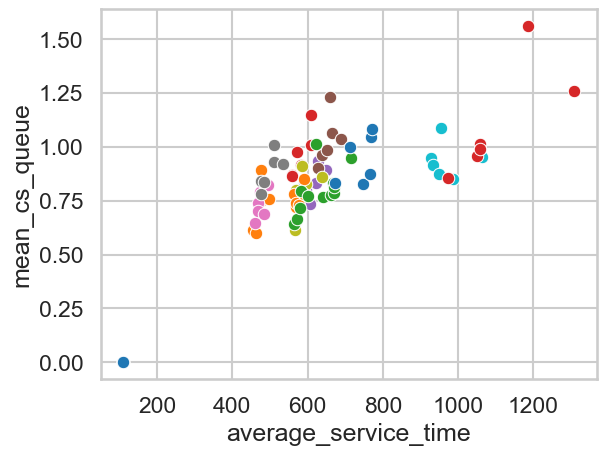

In [30]:
for i in range(14):
    sns.scatterplot(x="average_service_time", y="mean_cs_queue", data=res_overview_df_d[i])

In [18]:
res_paper_df

,Strategy,Min,Min Strat,Max,Max Strat,PPO
0,0,109.94,30,114.82449,PPO,114.82449
1,1,454.89,60,498.57,30,480.10397
2,2,640.82,80,714.27,30,648.49450
3,3,528.25183,PPO,609.32,70,528.25183
4,4,564.106,PPO,649.38,80,564.10600
5,5,616.92584,PPO,687.8,30,616.92584
6,6,459.53,60,495.59,30,488.33356
7,7,475.06,40,535.6,70,491.21213
8,8,557.5887,PPO,637.64,30,557.58870
9,9,826.43964,PPO,1063.53,30,826.43964


In [20]:
def trim_duplicate_signal_values(ts_df, column, verbose=False, samples=10000):
    ts_to_trim = ts_df[[column]].round(decimals=2)
    if verbose:
        print(f'Number of values in {column} before '
              f'trimming: {ts_to_trim.size}')
    ts_to_trim_shift_r = ts_to_trim.shift(1)
    ts_to_trim_shift_l = ts_to_trim.shift(-1)
    ts_trimmed = ts_to_trim[
        (ts_to_trim[column] != ts_to_trim_shift_r[column]) |
        (ts_to_trim[column] != ts_to_trim_shift_l[column])]
    # display(df_stufe_min_data)
    if verbose:
        print(f'Number of values in {column} after '
              f'trimming: {ts_trimmed.size}')
        print(f'Number of values after uniform sampling: {samples}')
    adjusted_n_samples = min(samples, ts_trimmed.shape[0])
    return ts_trimmed[column].sample(adjusted_n_samples)

def get_x_values(ts_df, index, column):
    return ts_df[column].loc[list(index)]

In [53]:
dfs_d[4][0].columns

Index(['total_distance', 'average_distance', 'travel_time_retrieval_ave',
       'distance_retrieval_ave', 'total_shift_distance', 'utilization_time',
       'n_queued_retrieval_orders', 'n_queued_delivery_orders',
       'n_finished_orders', 'kpi__throughput', 'kpi__makespan',
       'kpi__average_service_time', 'kpi__cycle_time', 'runtime',
       'n_free_agvs', 'n_pallet_shifts', 'n_steps', 'n_decision_steps',
       'fill_level', 'entropy', 'n_queued_charging_events',
       'avg_battery_level', 'n_agv_depleted', 'n_agv_not_depleted',
       'n_charging_events', 'strategy_name', 'n_zones'],
      dtype='object')

CPU times: total: 156 ms
Wall time: 255 ms


<Axes: xlabel='Time (in Seconds)', ylabel='N Free Agvs'>

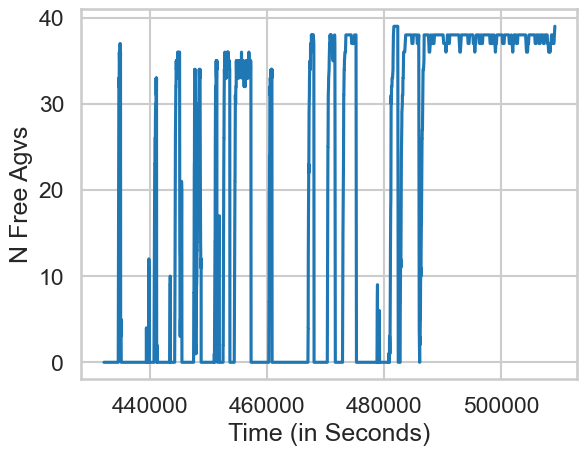

In [54]:
%%time

def plot_indicator(df, column_name, x_axis_col='kpi__makespan', ax=None, 
                   n_samples=10000, color=None, label='', alpha=1):
    trimmed_signal = trim_duplicate_signal_values(
        df, column_name, False, n_samples)
    time = get_x_values(df, trimmed_signal.index, x_axis_col)
    ax_modified = sns.lineplot(
        x=time, y=trimmed_signal.values, ax=ax, color=color, label=label, 
        alpha=alpha)
    ax_modified.set_ylabel(
        ' '.join([s.capitalize() for s in column_name.split('_')]))
    ax_modified.set_xlabel('Time (in Seconds)')
    return ax_modified

plot_indicator(dfs_d[4][0], 'n_free_agvs', 'kpi__makespan')

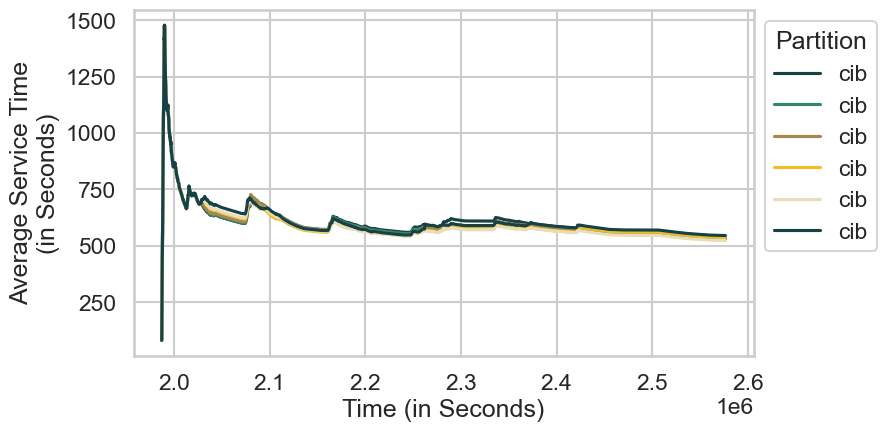

In [68]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
for df in dfs_d[4]:
    ax = sns.lineplot(ax=ax, x='kpi__makespan', y='kpi__average_service_time',
                      label=df.name, color=next(palette), data=df)

    ax.legend(title='Partition')
    # ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Text(0.5, 23.083333333333314, 'Threshold')

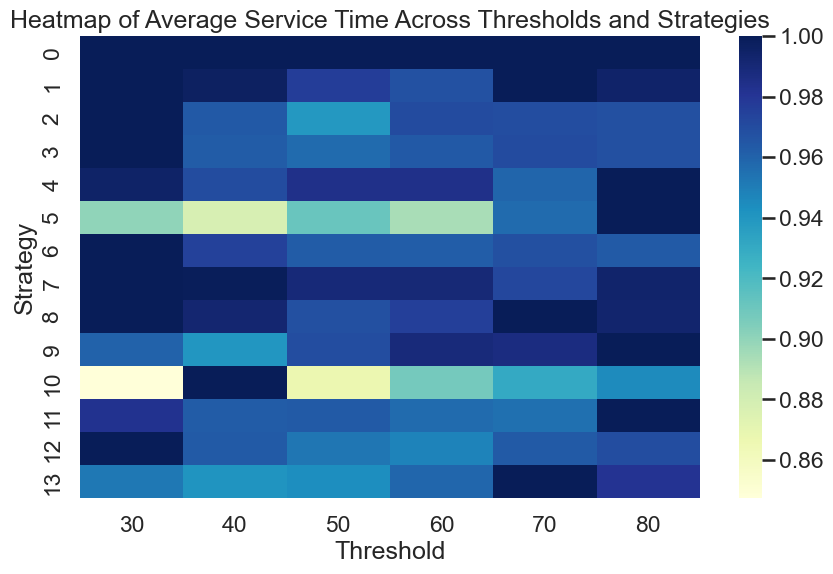

In [69]:
threshold_columns = [30, 40, 50, 60, 70, 80]  # Update based on actual threshold columns
heatmap_df = result_df.set_index("Strategy")[threshold_columns]
heatmap_df = heatmap_df.astype(float)
heatmap_df = heatmap_df.div(heatmap_df.max(axis=1), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Average Service Time Across Thresholds and Strategies")
plt.ylabel("Strategy")
plt.xlabel("Threshold")

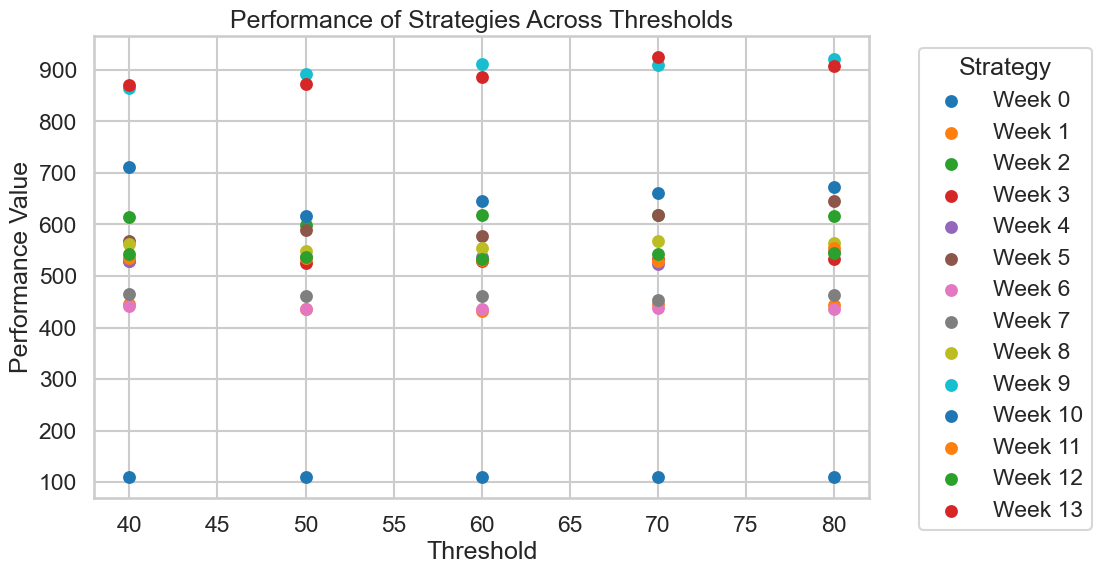

In [86]:
thresholds = result_df.columns[2:-1]  # select only threshold columns
plt.figure(figsize=(10, 6))

for i, row in result_df.iterrows():
    plt.scatter(thresholds, row[2:-1], label=f'Week {row["Strategy"]}', s=60)  # size can be adjusted

plt.xlabel("Threshold")
plt.ylabel("Performance Value")
plt.title("Performance of Strategies Across Thresholds")
plt.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

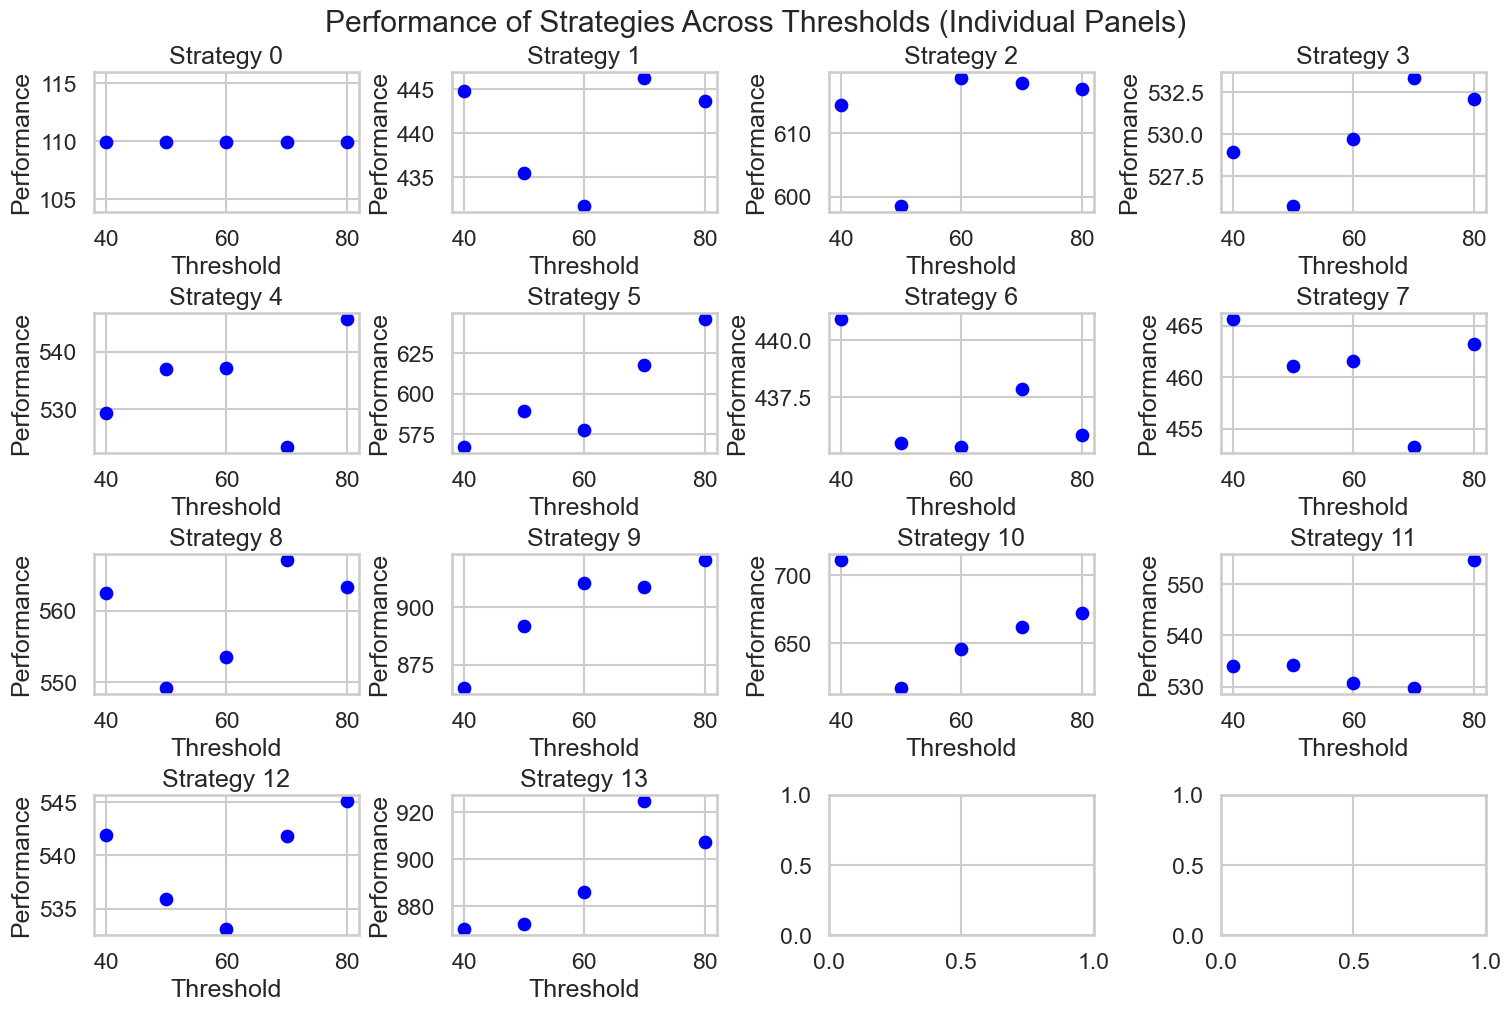

In [87]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 10), constrained_layout=True)
axs = axs.flatten()

for i, (index, row) in enumerate(result_df.iterrows()):
    axs[i].scatter(thresholds, row[2:-1], color='b', s=70)
    axs[i].set_title(f'Strategy {row["Strategy"]}')
    axs[i].set_xlabel("Threshold")
    axs[i].set_ylabel("Performance")

plt.suptitle("Performance of Strategies Across Thresholds (Individual Panels)")
plt.show()

In [56]:
result_df = result_df.astype(float)

In [57]:
dfs_d[4][4]

,total_distance,average_distance,travel_time_retrieval_ave,distance_retrieval_ave,total_shift_distance,utilization_time,n_queued_retrieval_orders,n_queued_delivery_orders,n_finished_orders,kpi__throughput,...,n_decision_steps,fill_level,entropy,n_queued_charging_events,avg_battery_level,n_agv_depleted,n_agv_not_depleted,n_charging_events,strategy_name,n_zones
0,290.6,20.757143,26.438462,41.553846,0.0,0.000003,184,0,1,0.000002,...,40,0.725144,0.128624,0,99.974666,0,40,0,days52,3
1,2517.8,61.409756,71.050000,104.689744,0.0,0.000009,183,3,2,0.000005,...,42,0.725092,0.134859,0,99.765732,0,40,0,days52,3
2,2979.0,67.704545,94.283740,138.092683,8.4,0.000020,182,4,3,0.000007,...,44,0.725041,0.135100,0,99.711699,0,40,0,days52,3
3,3022.8,67.173333,89.617073,131.392683,14.0,0.000030,181,4,4,0.000009,...,46,0.724990,0.135100,0,99.703659,0,40,0,days52,3
4,3264.8,69.463830,101.160000,147.927619,16.8,0.000042,180,4,5,0.000012,...,48,0.724938,0.135186,0,99.668323,0,40,0,days52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,1082946.8,86.552653,126.638780,186.961924,99145.2,0.076240,0,0,5575,0.010955,...,11226,0.646423,0.361463,0,50.259402,0,40,76,days52,3
5575,1083292.2,86.552589,126.638780,186.961924,99145.2,0.076233,0,0,5576,0.010955,...,11228,0.646474,0.361472,0,50.216587,0,40,76,days52,3
5576,1083435.6,86.550216,126.638780,186.961924,99145.2,0.076228,0,0,5577,0.010956,...,11230,0.646525,0.361565,0,50.192094,0,40,76,days52,3
5577,1083687.6,86.542693,126.638780,186.961924,99145.2,0.076221,0,0,5578,0.010956,...,11233,0.646576,0.361556,0,50.158066,1,39,76,days52,3


In [58]:
result_df.describe()

,Strategy,30,40,50,60,70,80,PPO
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,43.500000,556.469318,554.024091,557.363523,564.266136,577.026250,587.089318,533.508148
std,25.547342,321.628913,320.285244,321.349893,327.146469,336.564318,342.793179,308.260583
min,0.000000,109.940000,109.940000,109.940000,109.940000,109.940000,109.940000,112.517650
25%,21.750000,297.727500,297.825000,297.917500,297.820000,298.122500,298.220000,290.000625
50%,43.500000,588.180000,585.060000,595.430000,600.720000,609.465000,627.665000,577.084220
75%,65.250000,676.592500,685.515000,702.827500,723.662500,739.185000,736.620000,663.364750
max,87.000000,1935.710000,1931.700000,1920.120000,1918.770000,1917.900000,1910.960000,1930.578500


# Orders analysis

In [32]:
import json

orders = json.load(open("../1_environment/slapstack/slapstack/use_cases/wepastacks/2_orders.json")) 
initial_fill = json.load(open("../1_environment/slapstack/slapstack/use_cases/wepastacks/3_initial_fill_lvl.json"))

In [33]:
order_columns = ['type', 'sku', 'time', 'dock', 'batch', 'week']
order_df = pd.DataFrame(orders, columns=order_columns)

In [34]:
# Sort the orders by time
order_df = order_df.sort_values(by='time').reset_index(drop=True)

# Calculate the time difference between consecutive orders
order_df['time_diff'] = order_df['time'].diff()

# Define a threshold for breaks (e.g., 1200 seconds for a 20-minute break)
threshold = 1200

# Identify breaks
breaks = order_df[order_df['time_diff'] > threshold]

# Display the breaks
print(breaks[['time', 'time_diff']])

           time  time_diff
596      172800    68700.0
14218    345600    12410.0
16296    432000    20665.0
21875    518400     9312.0
30262    691282     7308.0
...         ...        ...
392997  7430400    33672.0
399742  7516800    18535.0
411575  7650000     1320.0
411615  7653600     3240.0
411715  7657200     3600.0

[77 rows x 2 columns]


In [36]:
# Group orders by week and then by day within each week
order_data_by_day = {}
for order in orders:
    week = order[-1]  # Assuming week is the last item in the order tuple
    time = order[2]  # Assuming time is the second-to-last item in the order tuple
    day = time // 86400  # Calculate the day within the week

    if day not in order_data_by_day:
        order_data_by_day[day] = []
    
    order_data_by_day[day].append(order)


In [38]:
len(order_data_by_day[5])

5579

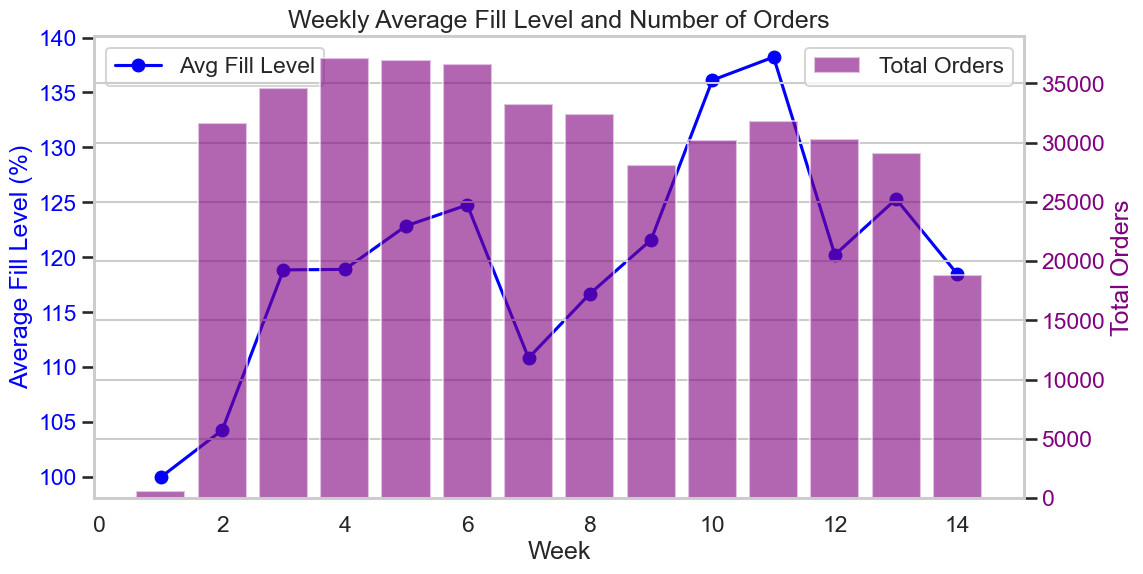

In [84]:
def process_orders_by_week(orders, initial_fill):
    # Create a DataFrame from the orders
    order_columns = ['type', 'sku', 'time', 'dock', 'batch', 'week']
    order_df = pd.DataFrame(orders, columns=order_columns)
    order_df['day'] = order_df['time'] // (24 * 3600)
    
    # Initialize the fill levels from the initial fill data
    fill_levels = initial_fill.copy()

    # Store fill levels at the beginning of each week
    weekly_fill_levels = {}

    # Process orders week by week
    for week in sorted(order_df['week'].unique()):
        # Get orders for the current week
        weekly_orders = order_df[order_df['week'] == week]
        
        # Store the fill level at the beginning of the week
        weekly_fill_levels[week] = fill_levels.copy()
        
        # Process each order for the current week
        for _, order in weekly_orders.iterrows():
            order_type, sku = order['type'], str(order['sku'])
            
            # For delivery, increase the stock of the SKU
            if order_type == "delivery":
                fill_levels[sku] = fill_levels.get(sku, 0) + 1
            # For retrieval, decrease the stock of the SKU
            elif order_type == "retrieval":
                fill_levels[sku] = fill_levels.get(sku, 0) - 1

    return weekly_fill_levels, order_df

# Process the orders and calculate weekly fill levels
weekly_fill_levels, order_df = process_orders_by_week(orders, initial_fill)

# Print the fill levels at the beginning of each week
# for week, fill in weekly_fill_levels.items():
#     print(f"Week {week}: Fill levels: {fill}")

In [79]:
def visualize_hourly_stock_movements(weekly_fill_levels, order_df, week=1):
    # Filter the orders for the given week and get the unique hours within this week
    first_week_orders = order_df[order_df['week'] == week]
    first_week_orders['hour'] = order_df['time'] // 3600  # Convert time to hours
    hours_in_week = sorted(first_week_orders['hour'].unique())

    # Initialize fill levels for aggregation at the start of the week
    fill_levels_at_start = weekly_fill_levels[week].copy()

    # Store the hourly changes in stock
    hourly_delivery_movements = []
    hourly_retrieval_movements = []
    
    # Process each hour within the week
    for hour in hours_in_week:
        hour_orders = first_week_orders[first_week_orders['hour'] == hour]

        # Track delivery and retrieval counts for the hour
        hourly_deliveries = 0
        hourly_retrievals = 0

        # Process each order within the hour
        for _, order in hour_orders.iterrows():
            order_type, sku = order['type'], str(order['sku'])
            if order_type == "delivery":
                hourly_deliveries += 1
                fill_levels_at_start[sku] = fill_levels_at_start.get(sku, 0) + 1
            elif order_type == "retrieval":
                hourly_retrievals += 1
                fill_levels_at_start[sku] = fill_levels_at_start.get(sku, 0) - 1

        # Append the hourly movements (deliveries and retrievals)
        hourly_delivery_movements.append(hourly_deliveries)
        hourly_retrieval_movements.append(hourly_retrievals)
    
    # Plot the hourly stock movements (deliveries and retrievals)
    plt.figure(figsize=(14, 6))
    plt.plot(hours_in_week, hourly_delivery_movements, label="Hourly Deliveries", color='g', marker='o')
    plt.plot(hours_in_week, hourly_retrieval_movements, label="Hourly Retrievals", color='r', marker='o')

    plt.title("Hourly Stock Movements (Deliveries and Retrievals) - First Week")
    plt.xlabel("Hour")
    plt.ylabel("Number of Movements")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

C:\Users\zm0714\AppData\Local\Temp\ipykernel_31480\3837030021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_week_orders['hour'] = order_df['time'] // 3600  # Convert time to hours


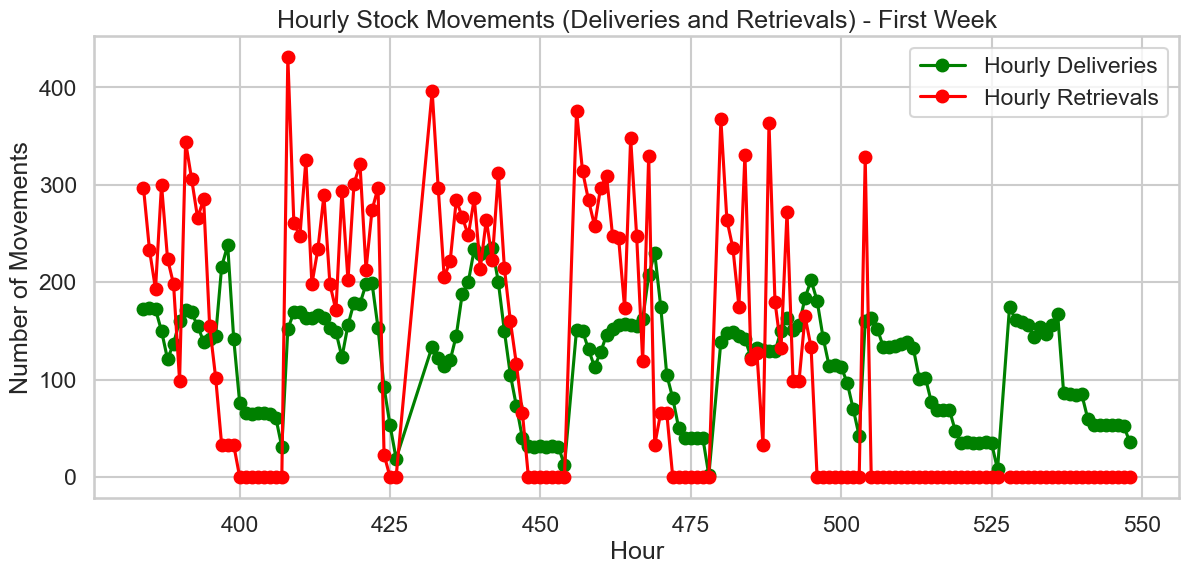

In [80]:
visualize_hourly_stock_movements(weekly_fill_levels, order_df, week=4)

In [82]:
weekly_summary = df_daily_fill.groupby('week').agg(
    avg_fill_level=('fill_level', 'mean'),   # Average fill level for the week
    total_orders=('net_change', 'count')     # Total number of orders (daily count sums to weekly total)
).reset_index()

# Step 2: Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average fill level on the left y-axis
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Fill Level (%)', color='blue')
ax1.plot(weekly_summary['week'], weekly_summary['avg_fill_level'] * 100, color='blue', marker='o', label='Avg Fill Level')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create a second y-axis for the total number of orders
ax2 = ax1.twinx()
ax2.set_ylabel('Total Orders', color='purple')
ax2.bar(weekly_summary['week'], weekly_summary['total_orders'], color='purple', alpha=0.6, label='Total Orders')
ax2.tick_params(axis='y', labelcolor='purple')

# Add titles and legends
plt.title("Weekly Average Fill Level and Number of Orders")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

NameError: name 'df_daily_fill' is not defined

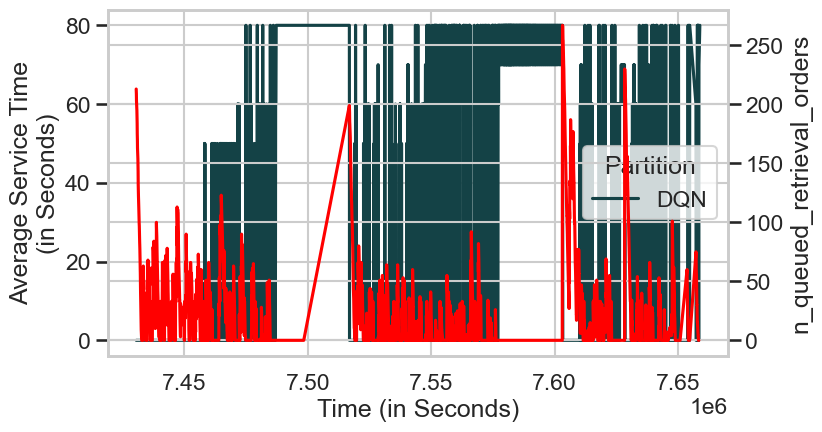

In [140]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
for df in dfs_d_actions[13]:
    ax = sns.lineplot(ax=ax, x='kpi__makespan', y='Action', 
                        label="DQN", color=next(palette), data=df)
    ax2 = plt.twinx()
    sns.lineplot(data=dfs_d[13][0], x='kpi__makespan', y='n_queued_retrieval_orders', color="red", ax=ax2)
    ax.legend(title='Partition')
    #ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')

In [ ]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
for df in dfs_d_actions[4]:
    ax = sns.lineplot(ax=ax, x='kpi__makespan', y='Action', 
                        label="DQN", color=next(palette), data=df)
    ax2 = plt.twinx()
    sns.scatterplot(data=dfs_d[4][0], x='Action', y='n_queued_retrieval_orders', color="red", ax=ax2)
    ax.legend(title='Partition')
    #ax.set_xlim((-5000, xlim + 20000))
    ax.set_xlabel('Time (in Seconds)')
    ax.set_ylabel('Average Service Time\n(in Seconds)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '# Retrieval Orders')

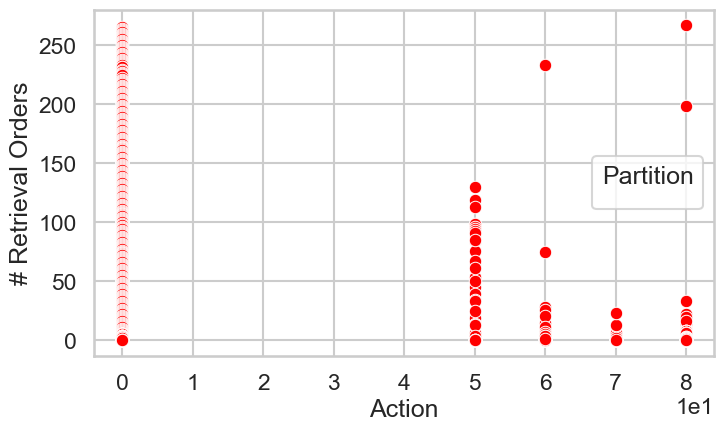

In [141]:
_, ax = plt.subplots(figsize=(8, 4.5))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

palette = cycle(pal)
sns.scatterplot(data=dfs_d_actions[13][0], x='Action', y='n_queued_retrieval_orders', color="red")
ax.legend(title='Partition')
#ax.set_xlim((-5000, xlim + 20000))
ax.set_xlabel('Action')
ax.set_ylabel('# Retrieval Orders')

In [142]:
df_result_actions = pd.DataFrame()
for idx_df in partitions: 
    for idx_m, model in enumerate(["PPO"]):
        df = dfs_d_actions[idx_df][idx_m]
        df["Model"] = model
        df["partition"] = idx_df
        df_result_actions = pd.concat([df_result_actions, df])

In [147]:
dfs_d_actions[0][0]["Action"].unique()

array([ 0, 80], dtype=int64)

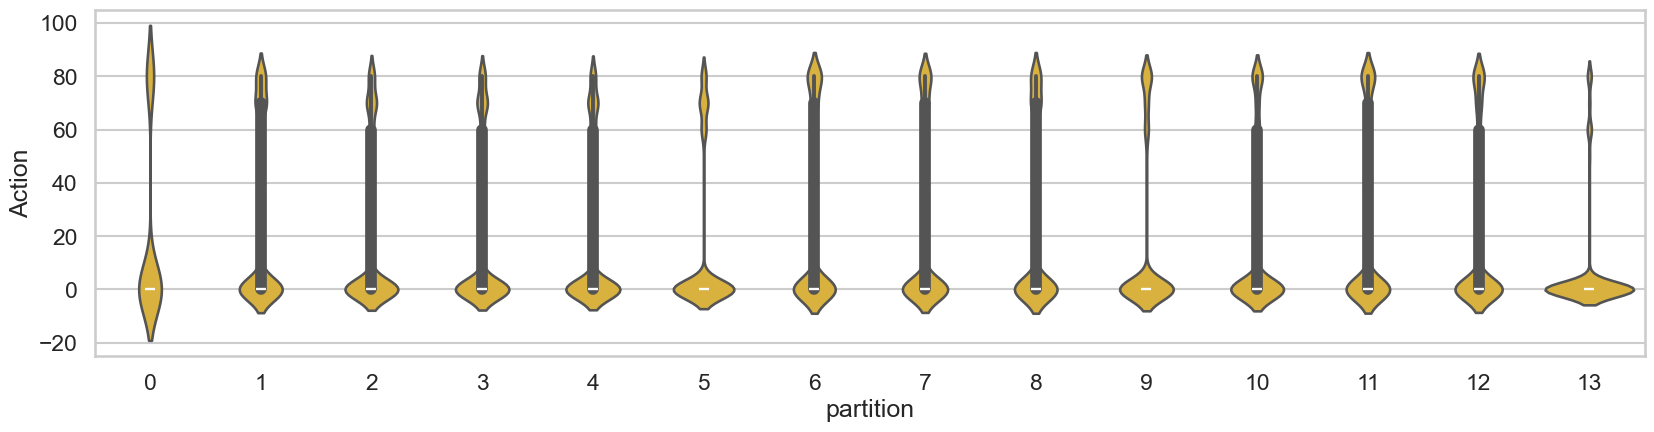

In [143]:
_, ax = plt.subplots(figsize=(20, 4.5))
ax.ticklabel_format(axis='x', style='sci')
palette = cycle([pal[0], pal[3]])
ax = sns.violinplot(ax=ax, x="partition", y="Action", data=df_result_actions[df_result_actions["Model"]=="PPO"], color=pal[3])

plt.savefig(f'{root_dir}/violinplot_dist_charging_actions_PPO.png', 
                    dpi=200, bbox_inches='tight', pad_inches=0)

In [136]:
for pt in range(14):
    print(dfs_d_actions[pt][0]["Action"].unique())

[ 0 80]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 80 70 50 60]
[ 0 80 70 60 50]
[ 0 80 70 60 50]
[ 0 50 60 80 70]
